In [1]:
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pylab import rcParams

# set maximum display rows as 200
pd.set_option('display.max_rows', 200)

plt.style.use('ggplot') # use ggplot styling
# displays graphs in the notebook
%matplotlib inline

In [2]:
df = pd.read_sql_table('printer', 'sqlite:///dissertation.db') 

In [4]:
df_copy = df.copy()

In [5]:
df_copy

,time,mean_power,weekofyear,day_name,hour,mins,day_type,kWh
0,2019-12-23 00:00:00,55.0,-1,0,0,0,weekday,0.000153
1,2019-12-23 00:00:10,55.0,-1,0,0,0,weekday,0.000153
2,2019-12-23 00:00:20,55.0,-1,0,0,0,weekday,0.000153
3,2019-12-23 00:00:30,55.0,-1,0,0,0,weekday,0.000153
4,2019-12-23 00:00:40,55.0,-1,0,0,0,weekday,0.000153
...,...,...,...,...,...,...,...,...
1451515,2020-06-07 23:59:10,55.5,23,6,23,59,holiday,0.000154
1451516,2020-06-07 23:59:20,55.5,23,6,23,59,holiday,0.000154
1451517,2020-06-07 23:59:30,56.0,23,6,23,59,holiday,0.000156
1451518,2020-06-07 23:59:40,55.5,23,6,23,59,holiday,0.000154


In [41]:
week = pd.DataFrame({'Week_kWh' : (df_copy.groupby( ['weekofyear'])['kWh'].sum())}).reset_index()
day = pd.DataFrame({'day_kWh' : (df_copy.groupby( ['day_name'])['kWh'].sum()/24)}).reset_index()
hour = pd.DataFrame({'hour_kWh' : (df_copy.groupby( ['hour'])['kWh'].sum()/24)}).reset_index()

In [42]:
week.describe()

,weekofyear,Week_kWh
count,24.000000,24.000000
mean,11.458333,11.118363
std,7.144345,1.885679
min,-1.000000,9.408043
25%,5.750000,9.408070
50%,11.500000,10.182181
75%,17.250000,13.225152
max,23.000000,14.286332


In [43]:
day

,day_name,day_kWh
0,0,1.675804
1,1,1.736562
2,2,1.615423
3,3,1.662992
4,4,1.674702
5,5,1.363191
6,6,1.389689


In [12]:
hour

,hour,hour_kWh
0,0,0.392961
1,1,0.392902
2,2,0.392804
3,3,0.392815
4,4,0.392728
5,5,0.392639
6,6,0.392676
7,7,0.392730
8,8,0.441601
9,9,0.481734


In [13]:
hour['hour_kWh'][0:7].sum()

2.749525694443348

In [15]:
hour['hour_kWh'][22:].sum()

0.8055489004626195

## Clustering Starts from Here

In [16]:
df_clustering =pd.read_sql_table('printer_tsfel', 'sqlite:///dissertation.db')

In [17]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     140 non-null    int64  
 1   0_Absolute energy         140 non-null    float64
 2   0_Mean                    140 non-null    float64
 3   0_Max                     140 non-null    float64
 4   0_Standard deviation      140 non-null    float64
 5   0_FFT mean coefficient_0  140 non-null    float64
 6   0_Spectral kurtosis       140 non-null    float64
 7   0_Skewness                140 non-null    float64
 8   0_Zero crossing rate      140 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.0 KB


In [18]:
df_clustering['time'] = pd.date_range(start="12/23/2019", end="05/10/2020", freq='D')

In [19]:
# prepare data for clustering
df_clustering['weekofyear']=df_clustering['time'].dt.week
df_clustering['day_categ']=df_clustering['time'].dt.day_name()
df_clustering['day_num']=df_clustering['time'].dt.weekday
df_clustering['day']=df_clustering['time'].dt.day


df_clustering['day_type'] = df_clustering['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_clustering.loc[(df_clustering.time >= '2019-12-24') & (df_clustering.time < '2019-12-26'), 'day_type']='holiday' #christmas
df_clustering.loc[(df_clustering.time == '2020-01-01'), 'day_type']='holiday' #new year
# lockdown week 13
df_clustering.loc[(df_clustering.weekofyear >12) & (df_clustering.weekofyear <25), 'day_type'] = 'holiday'

In [20]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     140 non-null    int64         
 1   0_Absolute energy         140 non-null    float64       
 2   0_Mean                    140 non-null    float64       
 3   0_Max                     140 non-null    float64       
 4   0_Standard deviation      140 non-null    float64       
 5   0_FFT mean coefficient_0  140 non-null    float64       
 6   0_Spectral kurtosis       140 non-null    float64       
 7   0_Skewness                140 non-null    float64       
 8   0_Zero crossing rate      140 non-null    float64       
 9   time                      140 non-null    datetime64[ns]
 10  weekofyear                140 non-null    int64         
 11  day_categ                 140 non-null    object        
 12  day_num               

In [31]:
df_clustering_ok=df_clustering.drop(['index','weekofyear','time','day','day_num','0_Zero crossing rate'],axis=1)
df_clustering_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   day_categ                 140 non-null    object 
 8   day_type                  140 non-null    object 
dtypes: float64(7), object(2)
memory usage: 10.0+ KB


In [32]:
df_dum = pd.get_dummies(df_clustering_ok)
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         140 non-null    float64
 1   0_Mean                    140 non-null    float64
 2   0_Max                     140 non-null    float64
 3   0_Standard deviation      140 non-null    float64
 4   0_FFT mean coefficient_0  140 non-null    float64
 5   0_Spectral kurtosis       140 non-null    float64
 6   0_Skewness                140 non-null    float64
 7   day_categ_Friday          140 non-null    uint8  
 8   day_categ_Monday          140 non-null    uint8  
 9   day_categ_Saturday        140 non-null    uint8  
 10  day_categ_Sunday          140 non-null    uint8  
 11  day_categ_Thursday        140 non-null    uint8  
 12  day_categ_Tuesday         140 non-null    uint8  
 13  day_categ_Wednesday       140 non-null    uint8  
 14  day_type_h

In [33]:
df_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ_Friday,day_categ_Monday,day_categ_Saturday,day_categ_Sunday,day_categ_Thursday,day_categ_Tuesday,day_categ_Wednesday,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.983746,0.838783,0.973763,0.651716,-0.535347,-0.457218,0.095015,0.107452,-0.285753,-0.259565,0.104032,0.194925,0.043893,-0.578031,0.795277,-0.297617
0_Mean,0.983746,1.000000,0.880773,0.971289,0.590233,-0.560500,-0.469629,0.114494,0.109394,-0.294991,-0.260155,0.099028,0.195801,0.036429,-0.606205,0.822645,-0.297569
0_Max,0.838783,0.880773,1.000000,0.927655,0.484250,-0.669351,-0.506835,0.113274,0.149696,-0.277533,-0.161268,0.062254,0.083913,0.029663,-0.722068,0.822426,-0.153327
0_Standard deviation,0.973763,0.971289,0.927655,1.000000,0.627645,-0.608103,-0.499886,0.107137,0.130781,-0.293381,-0.238676,0.097798,0.138681,0.057661,-0.655868,0.840984,-0.259286
0_FFT mean coefficient_0,0.651716,0.590233,0.484250,0.627645,1.000000,-0.315366,-0.278001,-0.045786,0.177834,-0.151264,-0.150581,0.138018,0.053209,-0.021430,-0.340600,0.454758,-0.157673
0_Spectral kurtosis,-0.535347,-0.560500,-0.669351,-0.608103,-0.315366,1.000000,0.919140,0.026472,-0.014013,0.036538,0.023860,-0.043844,0.027096,-0.056109,0.828362,-0.620159,-0.237108
0_Skewness,-0.457218,-0.469629,-0.506835,-0.499886,-0.278001,0.919140,1.000000,0.040110,0.015604,0.004094,0.022729,-0.040308,0.016415,-0.058644,0.777366,-0.542678,-0.272714
day_categ_Friday,0.095015,0.114494,0.113274,0.107137,-0.045786,0.026472,0.040110,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Monday,0.107452,0.109394,0.149696,0.130781,0.177834,-0.014013,0.015604,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,0.170247,-0.194966
day_categ_Saturday,-0.285753,-0.294991,-0.277533,-0.293381,-0.151264,0.036538,0.004094,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.018105,-0.363976,0.487415


<Figure size 2160x720 with 0 Axes>

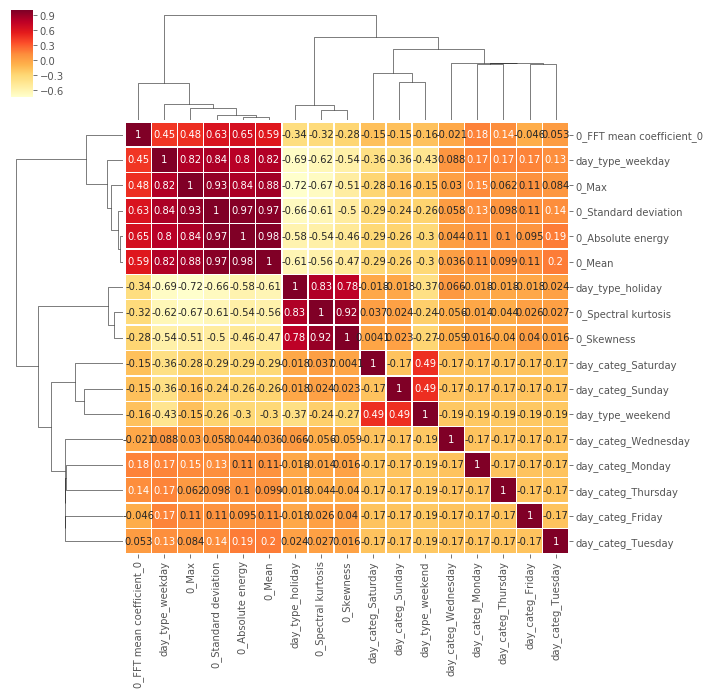

In [34]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr = df_dum.corr()

ax_ =sns.clustermap(corr,linewidth=0.5 ,cmap="YlOrRd",annot=True,annot_kws={"size": 10})

In [25]:
from sklearn.cluster import KMeans

In [35]:
# before clustering the values needing scaled 
import sklearn.preprocessing as preprocessing
df_scaled = preprocessing.scale(df_dum)

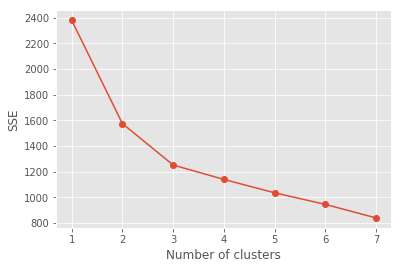

In [36]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 7
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [37]:
k_cluster = 2 
random_seed = 1
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [38]:
# assign labels to original dataframe
df_label=df_clustering_ok.assign(label=kmeans_method.labels_)

In [40]:
df_label.loc[df_label.label==1]

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,day_type,label
0,0.000341,0.000180,0.002665,0.000084,2.705212e-11,2.894021,14.000721,Monday,weekday,1
7,0.000272,0.000167,0.002908,0.000061,8.694789e-11,2.720050,19.809233,Monday,weekday,1
10,0.000698,0.000212,0.003161,0.000189,1.103293e-09,2.880997,8.145193,Thursday,weekday,1
11,0.000766,0.000246,0.003278,0.000168,1.985842e-10,2.619972,9.550454,Friday,weekday,1
14,0.000652,0.000217,0.003061,0.000168,1.652299e-10,2.871300,9.030511,Monday,weekday,1
15,0.000735,0.000238,0.002992,0.000169,1.722022e-10,2.645445,9.172854,Tuesday,weekday,1
16,0.000831,0.000228,0.003087,0.000211,8.872234e-10,3.472686,6.651699,Wednesday,weekday,1
17,0.000769,0.000224,0.002736,0.000196,1.773405e-09,3.388133,8.137449,Thursday,weekday,1
18,0.000907,0.000247,0.003036,0.000209,3.218893e-10,2.857195,7.498864,Friday,weekday,1
21,0.000573,0.000214,0.002913,0.000143,6.949722e-11,2.905966,10.296121,Monday,weekday,1


## Daily Clustering Starts from Here

In [44]:
df_hour = pd.read_sql_table('printer_hourtsfel', 'sqlite:///dissertation.db')

In [45]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3360 non-null   int64  
 1   0_Absolute energy         3360 non-null   float64
 2   0_Mean                    3360 non-null   float64
 3   0_Max                     3360 non-null   float64
 4   0_Standard deviation      3360 non-null   float64
 5   0_FFT mean coefficient_0  3360 non-null   float64
 6   0_Spectral kurtosis       3360 non-null   float64
 7   0_Skewness                3360 non-null   float64
 8   0_Zero crossing rate      3360 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 236.4 KB


In [46]:
df_hour['time'] = pd.date_range(start="12/23/2019 00:00:00", end="05/10/2020 23:00:00", freq='H')

In [47]:
# prepare data for clustering
df_hour['weekofyear']=df_hour['time'].dt.week
df_hour['day_categ']=df_hour['time'].dt.day_name()
df_hour['day_num']=df_hour['time'].dt.weekday
df_hour['day']=df_hour['time'].dt.day
df_hour['hour']=df_hour['time'].dt.hour
df_hour['hour']=df_hour['hour'].astype('object')

df_hour['day_type'] = df_hour['day_num'].apply(lambda x: 'weekday' if x <5 else 'weekend')
df_hour.loc[(df_hour.time >= '2019-12-24 00:00:00') & (df_hour.time < '2019-12-26 00:00:00'), 'day_type']='holiday' #christmas
df_hour.loc[(df_hour.time >= '2020-01-01 00:00:00') & (df_hour.time < '2020-01-02 00:00:00'), 'day_type']='holiday' #new year
# lockdown week 13
df_hour.loc[(df_hour.weekofyear >12) & (df_hour.weekofyear <25), 'day_type'] = 'holiday'

In [52]:
df_hour_ok=df_hour.drop(['index','weekofyear','time','day','day_num','0_Zero crossing rate'],axis=1)
df_hour_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   day_categ                 3360 non-null   object 
 8   hour                      3360 non-null   object 
 9   day_type                  3360 non-null   object 
dtypes: float64(7), object(3)
memory usage: 262.6+ KB


In [53]:
df_hour_dum = pd.get_dummies(df_hour_ok)
df_hour_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0_Absolute energy         3360 non-null   float64
 1   0_Mean                    3360 non-null   float64
 2   0_Max                     3360 non-null   float64
 3   0_Standard deviation      3360 non-null   float64
 4   0_FFT mean coefficient_0  3360 non-null   float64
 5   0_Spectral kurtosis       3360 non-null   float64
 6   0_Skewness                3360 non-null   float64
 7   day_categ_Friday          3360 non-null   uint8  
 8   day_categ_Monday          3360 non-null   uint8  
 9   day_categ_Saturday        3360 non-null   uint8  
 10  day_categ_Sunday          3360 non-null   uint8  
 11  day_categ_Thursday        3360 non-null   uint8  
 12  day_categ_Tuesday         3360 non-null   uint8  
 13  day_categ_Wednesday       3360 non-null   uint8  
 14  hour_0  

In [54]:
df_hour_dum.corr()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ_Friday,day_categ_Monday,day_categ_Saturday,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_type_holiday,day_type_weekday,day_type_weekend
0_Absolute energy,1.000000,0.922251,0.745394,0.912131,0.454171,-0.227499,0.166803,4.243339e-02,4.798760e-02,-1.276160e-01,...,4.483764e-02,6.218139e-02,3.987982e-02,-8.683860e-03,-4.832500e-02,-6.255343e-02,-6.675831e-02,-2.581463e-01,3.551672e-01,-1.329144e-01
0_Mean,0.922251,1.000000,0.809141,0.863875,0.353762,-0.271763,0.249961,6.294558e-02,6.014147e-02,-1.621772e-01,...,7.783274e-02,8.000263e-02,5.623987e-02,5.283436e-03,-4.710174e-02,-7.288422e-02,-8.291428e-02,-3.332733e-01,4.522656e-01,-1.635944e-01
0_Max,0.745394,0.809141,1.000000,0.908310,0.269371,-0.279616,0.336384,5.531549e-02,4.502278e-02,-1.441322e-01,...,8.194535e-02,4.805053e-02,-5.669028e-03,-4.168876e-02,-6.441417e-02,-7.732970e-02,-7.933785e-02,-2.967007e-01,3.996954e-01,-1.418871e-01
0_Standard deviation,0.912131,0.863875,0.908310,1.000000,0.422682,-0.265560,0.219619,4.253807e-02,4.463883e-02,-1.316311e-01,...,6.281852e-02,5.149669e-02,4.941670e-03,-2.543388e-02,-5.706596e-02,-6.885333e-02,-7.149335e-02,-2.771660e-01,3.727325e-01,-1.317187e-01
0_FFT mean coefficient_0,0.454171,0.353762,0.269371,0.422682,1.000000,-0.079968,0.026700,-3.430176e-03,5.877002e-03,-4.405069e-02,...,2.585924e-03,4.609663e-02,-1.434099e-02,2.127445e-02,-1.911925e-02,-2.140222e-02,-2.241948e-02,-8.356985e-02,1.193240e-01,-4.857915e-02
0_Spectral kurtosis,-0.227499,-0.271763,-0.279616,-0.265560,-0.079968,1.000000,-0.141758,8.508036e-03,-6.600395e-03,-1.071197e-04,...,-4.720347e-03,1.314596e-02,3.995241e-02,2.934647e-03,3.894664e-02,9.192744e-03,3.074337e-03,7.234062e-01,-4.913335e-01,-2.712514e-01
0_Skewness,0.166803,0.249961,0.336384,0.219619,0.026700,-0.141758,1.000000,8.536696e-03,5.505329e-02,-9.143840e-02,...,4.985927e-02,1.840503e-02,-3.859242e-02,7.121165e-03,-3.277577e-02,-5.841814e-02,-3.789191e-02,1.812399e-01,-2.363969e-02,-1.949987e-01
day_categ_Friday,0.042433,0.062946,0.055315,0.042538,-0.003430,0.008508,0.008537,1.000000e+00,-1.666667e-01,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Monday,0.047988,0.060141,0.045023,0.044639,0.005877,-0.006600,0.055053,-1.666667e-01,1.000000e+00,-1.666667e-01,...,5.640974e-17,5.643927e-17,5.646880e-17,5.661647e-17,6.621499e-17,7.534096e-17,7.537050e-17,-1.810517e-02,1.702469e-01,-1.949659e-01
day_categ_Saturday,-0.127616,-0.162177,-0.144132,-0.131631,-0.044051,-0.000107,-0.091438,-1.666667e-01,-1.666667e-01,1.000000e+00,...,5.664601e-17,5.667554e-17,5.670508e-17,5.685275e-17,6.633313e-17,7.545910e-17,7.548863e-17,-1.810517e-02,-3.639761e-01,4.874147e-01


<Figure size 2160x720 with 0 Axes>

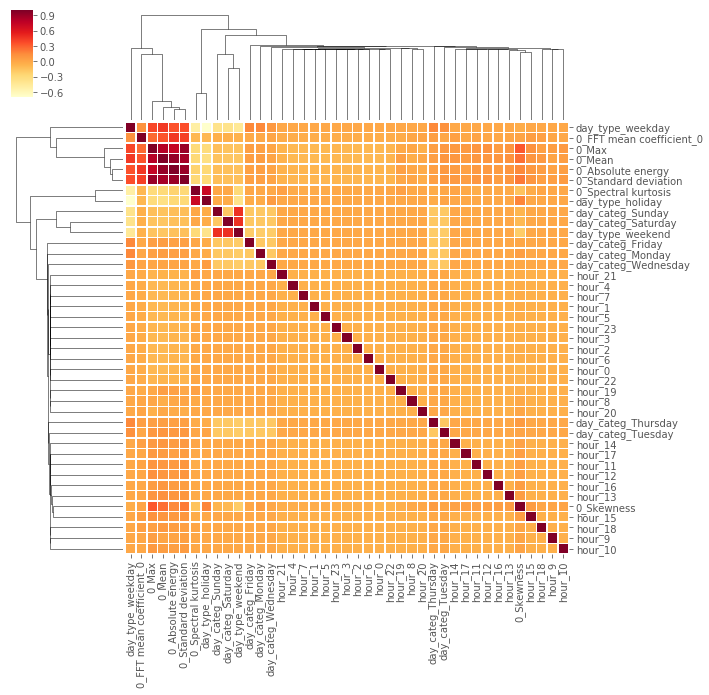

In [55]:
# plot correlation heatmap
fig = plt.figure(figsize=(30, 10))

corr_hour = df_hour_dum.corr()

ax_ =sns.clustermap(corr_hour,linewidth=0.5 ,cmap="YlOrRd",annot=False,annot_kws={"size": 10})

In [56]:
df_hour_scaled = preprocessing.scale(df_hour_dum) 

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


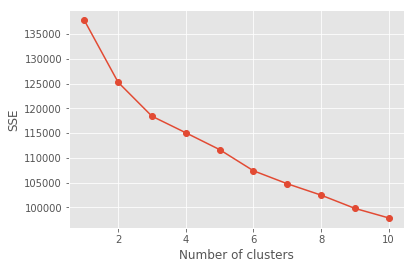

In [57]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k = 10
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

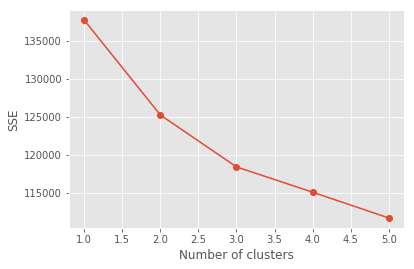

In [72]:
# calculate SSE for a range of number of cluster
hour_list_SSE = []
hour_min_k = 1
hour_max_k =5
hour_range_k = range(hour_min_k, hour_max_k+1)
for i in hour_range_k:
    hour_km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        tol=1e-04, random_state=0
    )
    hour_km.fit(df_hour_scaled)
    # inertia is a concept in physics. Roughly it means SSE of clustering.
    hour_list_SSE.append(hour_km.inertia_)

# plot
plt.plot(hour_range_k, hour_list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [58]:
hour_k_cluster = 3
random_seed = 1
hour_kmeans_method = KMeans(n_clusters=hour_k_cluster,random_state=random_seed)
hour_kmeans_method.fit(df_hour_scaled)

KMeans(n_clusters=3, random_state=1)

In [59]:
df_hour_label=df_hour_ok.assign(label=hour_kmeans_method.labels_)

In [60]:
df_hour_gr1=df_hour_label.loc[df_hour_label.label==1]

In [61]:
df_hour_gr2=df_hour_label.loc[df_hour_label.label==0]

In [65]:
df_hour_gr3=df_hour_label.loc[df_hour_label.label==2]

In [73]:
pd.set_option('display.max_rows', None)

In [88]:
df_hour_gr2

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,hour,day_type,label
24,8.406188,0.152809,0.154167,2.047299e-04,2.914864e-10,1.585620e+02,6.482494e+00,Tuesday,0,holiday,0
25,8.409599,0.152840,0.154167,2.862228e-04,1.368106e-11,1.168607e+02,4.421144e+00,Tuesday,1,holiday,0
26,8.404057,0.152789,0.154167,1.262582e-04,6.452959e-11,2.552894e+02,1.081704e+01,Tuesday,2,holiday,0
27,8.405336,0.152801,0.154167,1.778043e-04,8.739269e-12,1.809493e+02,7.550957e+00,Tuesday,3,holiday,0
28,8.403630,0.152785,0.154167,1.032337e-04,3.172329e-11,3.198010e+02,1.330434e+01,Tuesday,4,holiday,0
29,8.404909,0.152797,0.154167,1.625415e-04,2.394748e-11,1.948742e+02,8.307472e+00,Tuesday,5,holiday,0
30,8.407901,0.152824,0.155556,2.891203e-04,7.906208e-11,1.225730e+02,6.906040e+00,Tuesday,6,holiday,0
31,8.407897,0.152824,0.155556,2.699515e-04,2.080498e-12,1.340829e+02,6.289963e+00,Tuesday,7,holiday,0
32,8.412583,0.152867,0.154167,3.396596e-04,7.620211e-11,9.922951e+01,3.566570e+00,Tuesday,8,holiday,0
33,8.405762,0.152805,0.154167,1.917791e-04,2.961044e-11,1.719301e+02,6.960489e+00,Tuesday,9,holiday,0


In [75]:
df_hour_gr1.groupby(['hour']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,day_type,label
hour,,,,,,,,,,
0,88,88,88,88,88,88,88,88,88,88
1,88,88,88,88,88,88,88,88,88,88
2,88,88,88,88,88,88,88,88,88,88
3,88,88,88,88,88,88,88,88,88,88
4,88,88,88,88,88,88,88,88,88,88
5,88,88,88,88,88,88,88,88,88,88
6,88,88,88,88,88,88,88,88,88,88
7,88,88,88,88,88,88,88,88,88,88
8,70,70,70,70,70,70,70,70,70,70


In [85]:
df_hour_gr3.groupby(['hour']).count()

,0_Absolute energy,0_Mean,0_Max,0_Standard deviation,0_FFT mean coefficient_0,0_Spectral kurtosis,0_Skewness,day_categ,day_type,label
hour,,,,,,,,,,
8,18,18,18,18,18,18,18,18,18,18
9,31,31,31,31,31,31,31,31,31,31
10,34,34,34,34,34,34,34,34,34,34
11,40,40,40,40,40,40,40,40,40,40
12,44,44,44,44,44,44,44,44,44,44
13,41,41,41,41,41,41,41,41,41,41
14,36,36,36,36,36,36,36,36,36,36
15,45,45,45,45,45,45,45,45,45,45
16,32,32,32,32,32,32,32,32,32,32


In [82]:
df_hour_gr1.groupby(['hour','day_type']).count()

0_Absolute energy  0_Mean  0_Max  0_Standard deviation  \
hour day_type                                                           
0    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
1    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
2    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
3    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
4    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
5    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
6    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
7    weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
8    weekday                  44      44     44                    44   
     weekend                  26      26     26                    26   
9    weekday                  31      31     31                    31   
     weekend                  26      26     26                    26   
10   weekday                  30      30     30                    30   
     weekend                  24      24     24                    24   
11   weekday                  22      22     22                    22   
     weekend                  26      26     26                    26   
12   weekday                  22      22     22                    22   
     weekend                  22      22     22                    22   
13   weekday                  22      22     22                    22   
     weekend                  25      25     25                    25   
14   weekday                  27      27     27                    27   
     weekend                  25      25     25                    25   
15   weekday                  20      20     20                    20   
     weekend                  23      23     23                    23   
16   weekday                  30      30     30                    30   
     weekend                  26      26     26                    26   
17   weekday                  29      29     29                    29   
     weekend                  24      24     24                    24   
18   weekday                  34      34     34                    34   
     weekend                  26      26     26                    26   
19   weekday                  48      48     48                    48   
     weekend                  25      25     25                    25   
20   weekday                  55      55     55                    55   
     weekend                  26      26     26                    26   
21   weekday                  61      61     61                    61   
     weekend                  25      25     25                    25   
22   weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   
23   weekday                  62      62     62                    62   
     weekend                  26      26     26                    26   

               0_FFT mean coefficient_0  0_Spectral kurtosis  0_Skewness  \
hour day_type                                                              
0    weekday                         62                   62          62   
     weekend                         26                   26          26   
1    weekday                         62                   62